<a href="https://colab.research.google.com/github/rajy4683/S8EVA4/blob/master/S8EVA4_SingleScript4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import sys

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive



### **[RekogNizer library](https://github.com/rajy4683/RekogNizer.git) contains the following files:**
```
1. basemodelclass.py:   Contains core model definitions. 
2. fileutils.py:        Contains utility functions for model_name_generation, plotting functions 
3. dataloader.py:       Contains dataloaders for both training and test data
4. traintest.py:        Contains core training, test and model execution flow routines. 
5. logger.py:           Contains functions to handle WANDB integration
6. hyperparams.py:      Contains values of default hyperparameters alongwith getter and setter functions   
7. train_s7_new.py:     Main wrapper script or point of entry. It parses hyperparameters as arguments
8. requirements.txt:    Specific libraries that need to be available in the environment
```








#### Downloading and installing dependencies from the GitHub link:


In [0]:
!git clone https://github.com/rajy4683/RekogNizer.git /content/drive/My\ Drive/EVA4/RekogNizer

In [2]:
!pip install -r /content/drive/My\ Drive/EVA4/RekogNizer/requirements.txt

     |████████████████████████████████| 112kB 2.8MB/s 
     |████████████████████████████████| 1.4MB 4.3MB/s 
     |████████████████████████████████| 102kB 7.3MB/s 
     |████████████████████████████████| 460kB 11.2MB/s 
     |████████████████████████████████| 102kB 7.9MB/s 
     |████████████████████████████████| 102kB 7.7MB/s 
     |████████████████████████████████| 71kB 8.1MB/s 
     |████████████████████████████████| 71kB 7.3MB/s 
  Created wheel for watchdog: filename=watchdog-0.10.2-cp36-none-any.whl size=73605 sha256=840c4ff4e3a73832dfe6cfc6810cc0f72522c18daee42915383e23c08e078880
  Stored in directory: /root/.cache/pip/wheels/bc/ed/6c/028dea90d31b359cd2a7c8b0da4db80e41d24a59614154072e
  Created wheel for subprocess32: filename=subprocess32-3.5.4-cp36-none-any.whl size=6489 sha256=a16a3f41d7d4695149599e5acf0f9c539d11dd03bfa4063b6364fb5fdbd79954
  Stored in directory: /root/.cache/pip/wheels/68/39/1a/5e402bdfdf004af1786c8b853fd92f8c4a04f22aad179654d1
  Created wheel for gql: file

#### WANDB client login

In [3]:
!wandb login a6f947d2d2f69e7a8c8ca0f69811fd554f27d204

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
Successfully logged in to Weights & Biases!


In [0]:
sys.path.append('/content/drive/My Drive/EVA4/')
sys.path.append('/content/drive/My Drive/EVA4/RekogNizer')

### This notebook is the 3rd and final chapter in Race to 94% with Resnet18
### Below are the steps taken to reach this accuracy:
1. Unmodified Resnet without any Regularizations nor Image Augmentations
Result:  Reached 84% however, the model was overfitting heavily. 
2. Image augmentation and Dropout were added to the model:
Result: Max Accuracy 92.27 in 45 epochs (https://github.com/rajy4683/S8EVA4/blob/master/S8EVA4_SingleScript.ipynb)
3. Used Image augmentation and StepLR to reach better accuracy:
Result: Reached 92.55 percent (https://github.com/rajy4683/S8EVA4/blob/master/S8EVA4_SingleScript2.ipynb)
4. Final Chapter (This notebook) - CyclicLR + Hyperparam tuning
https://github.com/rajy4683/S8EVA4/blob/master/S8EVA4_SingleScript3.ipynb

#### Final Accuracy with Dropout and Cyclic LR is 94.37% reached in 92nd Epoch. Target was to reach within 80 epochs at max :(




train_s8_new.py currently can take JSON formatted string as input. Following parameters are configurable and are used in the model training and execution.
```
{"project": "news5", 
 "sched_lr_gamma": 0.5, 
 "no_cuda": false, 
 "dropout": 0.1, 
 "test_batch_size": 128, 
 "batch_size": 128, 
 "epochs": 45, 
 "bias": false, 
 "lr": 0.001, 
 "start_lr": 0, 
 "sched_lr_step": 1, 
 "weight_decay": 0.0, 
 "seed": 1, 
 "momentum": 0.9}

```


In [0]:
!python /content/drive/My\ Drive/EVA4/RekogNizer/train_s8_new.py -p '{"lr":0.21694816106338752,"dropout":0.1, "momentum":0.7062620648684866, "epochs":100, "weight_decay":0.00015753761358641488}'

Setting  lr  =  0.21694816106338752
Setting  dropout  =  0.1
Setting  momentum  =  0.7062620648684866
Setting  epochs  =  100
Setting  weight_decay  =  0.00015753761358641488
Final Hyperparameters
             dropout : 0.1 
          batch_size : 128 
     test_batch_size : 128 
                  lr : 0.21694816106338752 
            momentum : 0.7062620648684866 
             no_cuda : False 
                seed : 1 
              epochs : 100 
                bias : False 
      sched_lr_gamma : 0.5 
       sched_lr_step : 1 
            start_lr : 0 
        weight_decay : 0.00015753761358641488 
             project : news5 
Initializing datasets and dataloaders
Files already downloaded and verified
Files already downloaded and verified
wandb: Tracking run with wandb version 0.8.29
wandb: Run data is saved locally in wandb/run-20200307_164358-mfwas4hp
wandb: Syncing run visionary-waterfall-803
wandb: ⭐️ View project at https://app.wandb.ai/rajy4683/news5
wandb: 🚀 View run at http

#### The APIs for inferencing and plotting are moved out of the training script.


In [0]:
from RekogNizer import traintest
from RekogNizer import logger
from RekogNizer import fileutils
from RekogNizer import basemodelclass
from RekogNizer import dataloader

import pandas as pd
import numpy as np
import torch

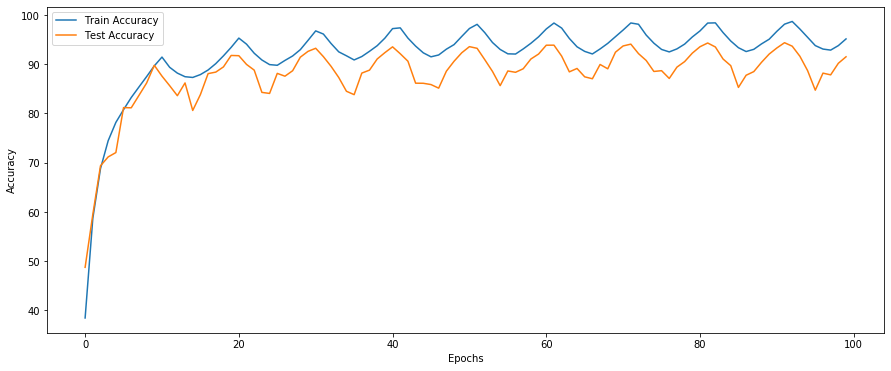

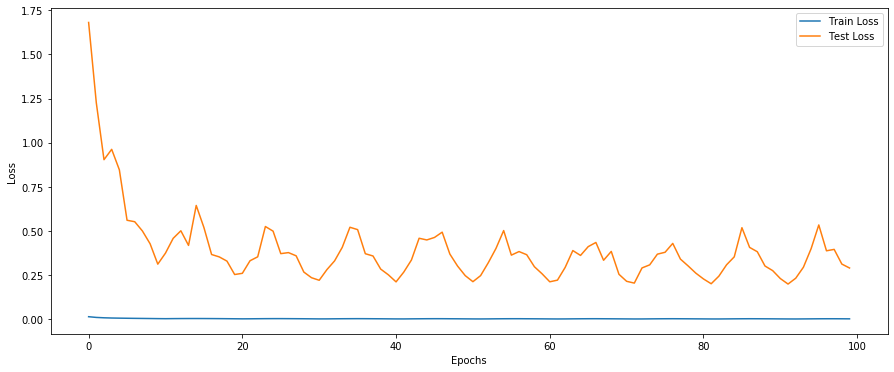

In [0]:
run_list = ['rajy4683/news5/runs/mfwas4hp']
runs_df = logger.get_wandb_dataframes(run_list=run_list)#(project="rajy4683/news5",count=1)
new_df = pd.DataFrame().append(runs_df)


fileutils.plot_graphs([new_df],
            ['Train Accuracy', 'Test Accuracy'],
            columns=['Train Accuracy', 'Test Accuracy'],
            xlabel="Epochs",
            ylabel="Accuracy")

fileutils.plot_graphs([new_df],
            ['Train Loss', 'Test Loss'],
            columns=['Train Loss', 'Test Loss'],
            xlabel="Epochs",
            ylabel="Loss")

In [0]:
%load_ext autoreload
%autoreload 2
from RekogNizer import traintest
import torchvision.transforms as transforms
import torchvision

my_model,acc = traintest.model_builder2(basemodelclass.ResNet18(), weights_path="/content/drive/My Drive/EVA4/model_saves/model-232ed07cad.h5")
#class_accuracy_dict = traintest.classwise_accuracy(my_model, testloader, classes, device=torch.device("cpu"))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [0]:
from RekogNizer import hyperparams
transform_test = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                    download=True, transform=transform_test)
testloader = dataloader.get_dataloader(testset, hyperparams.hyperparameter_defaults['batch_size'], shuffle=False, num_workers=2)
class_accuracy_dict = traintest.classwise_accuracy(my_model, testloader, dataloader.classes, device=torch.device("cuda"))


Extracting ./data/cifar-10-python.tar.gz to ./data
Accuracy of plane : 94 %
Accuracy of   car : 96 %
Accuracy of  bird : 89 %
Accuracy of   cat : 84 %
Accuracy of  deer : 93 %
Accuracy of   dog : 89 %
Accuracy of  frog : 94 %
Accuracy of horse : 95 %
Accuracy of  ship : 95 %
Accuracy of truck : 93 %


<BarContainer object of 10 artists>

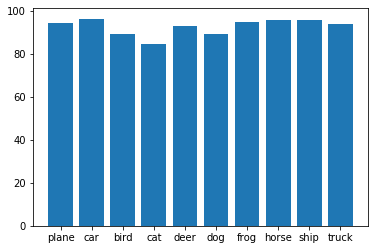

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.bar([key for key in class_accuracy_dict.keys()],[val for val in class_accuracy_dict.values()])

In [5]:
!python /content/drive/My\ Drive/EVA4/RekogNizer/train_s8_new.py -p '{"lr":0.21694816106338752,"dropout":0.1, "momentum":0.7062620648684866, "epochs":100, "weight_decay":0.00015753761358641488}'


loss=0.09717852622270584 batch_id=390: 100%|██| 391/391 [00:40<00:00,  9.57it/s]
Epoch: 98 Train set: Average loss: 0.0016, Accuracy: 93.070%
Epoch: 98 Test set: Average loss: 0.3456, Accuracy: 89.330%

loss=0.1208556741476059 batch_id=390: 100%|███| 391/391 [00:41<00:00,  9.53it/s]
Epoch: 99 Train set: Average loss: 0.0013, Accuracy: 94.018%
Epoch: 99 Test set: Average loss: 0.2923, Accuracy: 91.180%

loss=0.23201093077659607 batch_id=390: 100%|██| 391/391 [00:40<00:00,  9.81it/s]

Epoch: 100 Train set: Average loss: 0.0011, Accuracy: 95.124%
Epoch: 100 Test set: Average loss: 0.2756, Accuracy: 91.920%
Final model save path: /content/drive/My Drive/EVA4/model_saves/model-20f727c1e2.h5  best Accuracy: 94.17

wandb: Waiting for W&B process to finish, PID 379
wandb: Program ended successfully.
wandb: Run summary:
wandb:                          Train Accuracy 95.124
wandb:                              Train Loss 0.0010909351313486695
wandb:                                _runtime 4459.1